![Alternative Text][1701618522456]

[1701618522456]: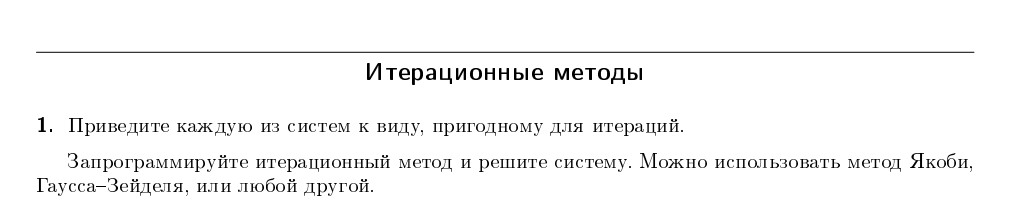

In [107]:
import typing

import numpy

In [108]:
def ldr_decomposition(A: numpy.ndarray) -> typing.Tuple[numpy.ndarray, numpy.ndarray, numpy.ndarray]:
    return numpy.tril(A, k = -1), numpy.diagflat(numpy.diag(A)), numpy.triu(A, k = 1)

def solve(A: numpy.ndarray, b: numpy.ndarray) -> numpy.ndarray:
    b = A.T @ b.reshape((-1, 1))
    A = A.T @ A
    
    L, D, R = ldr_decomposition(A)
    K = numpy.linalg.inv(D + L)
    P = K @ (D + L - A)
    B = K @ b

    x = numpy.zeros_like(b)
    for i in range(0, 10000):
        x = P @ x + B

    return x, A @ x - b

![Alternative Text][1701618531280]

[1701618531280]: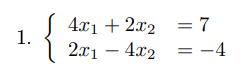

In [109]:
solve(
    numpy.array([ [ 4, 2 ], [ 2, -4 ] ]),
    numpy.array([ 7, -4 ])
)

(array([[1. ],
        [1.5]]),
 array([[0.],
        [0.]]))

![Alternative Text][1701618538368]

[1701618538368]: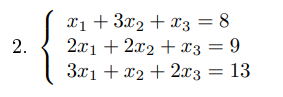

In [110]:
solve(
    numpy.array([ [ 1, 3, 1 ], [ 2, 2, 1 ], [ 3, 1, 2 ] ]),
    numpy.array([ 8, 9, 13 ])
)

(array([[2.],
        [1.],
        [3.]]),
 array([[0.],
        [0.],
        [0.]]))

![Alternative Text][1701618546472]

[1701618546472]: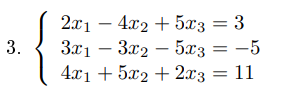

In [111]:
solve(
    numpy.array([ [ 2, -4, 5 ], [ 3, -3, -5 ], [ 4, 5, 2 ] ]),
    numpy.array([ 3, -5, 11 ])
)

(array([[1.],
        [1.],
        [1.]]),
 array([[ 0.00000000e+00],
        [-7.10542736e-15],
        [-7.10542736e-15]]))